In [1]:
import pandas as pd

In [2]:
# Adjust accordingly
df = pd.read_csv("combined_bike_trips_2023.csv") 

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DC1CB984821DFFF7,classic_bike,2023-01-07 15:36:53.43,2023-01-07 15:39:45.406,Vesey St & Church St,5216.06,Albany St & Greenwich St,5145.02,40.712220,-74.010472,40.709267,-74.013247,member
1,C00CA02971557F16,classic_bike,2023-01-04 19:23:01.234,2023-01-04 19:34:57.151,Lispenard St & Broadway,5391.06,St Marks Pl & 1 Ave,5626.13,40.719392,-74.002472,40.727791,-73.985649,member
2,E4415A543C1972A7,classic_bike,2023-01-24 10:38:01.135,2023-01-24 10:41:40.749,E 5 St & Ave A,5626.06,E 1 St & 1 Ave,5593.01,40.724790,-73.984301,40.723356,-73.988650,member
3,4FC76B63F9FE631F,classic_bike,2023-01-26 19:17:23.2,2023-01-26 19:47:05.287,W 59 St & 10 Ave,7023.04,E 1 St & 1 Ave,5593.01,40.770513,-73.988038,40.723356,-73.988650,member
4,153486234EA3E427,electric_bike,2023-01-10 08:29:04.191,2023-01-10 08:33:49.274,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member


In [4]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [5]:
# Convert 'started_at' to datetime, allowing pandas to infer the format
df['started_at'] = pd.to_datetime(df['started_at'], format="mixed")

In [6]:
# Convert 'started_at' to datetime, allowing pandas to infer the format
df['ended_at'] = pd.to_datetime(df['ended_at'], format="mixed")

In [7]:
df['duration'] = df['ended_at'] - df['started_at'] 

In [8]:
# If 'duration' is a timedelta, convert it to minutes
df['duration_minutes'] = df['duration'].dt.total_seconds() / 60
df['duration_minutes'].head()

0     2.866267
1    11.931950
2     3.660233
3    29.701450
4     4.751383
Name: duration_minutes, dtype: float64

In [9]:
import numpy as np
df['duration_minutes'] = np.ceil(df['duration_minutes']).astype(int)
df['duration_minutes'].head()

0     3
1    12
2     4
3    30
4     5
Name: duration_minutes, dtype: int32

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_minutes
0,DC1CB984821DFFF7,classic_bike,2023-01-07 15:36:53.430,2023-01-07 15:39:45.406,Vesey St & Church St,5216.06,Albany St & Greenwich St,5145.02,40.712220,-74.010472,40.709267,-74.013247,member,0 days 00:02:51.976000,3
1,C00CA02971557F16,classic_bike,2023-01-04 19:23:01.234,2023-01-04 19:34:57.151,Lispenard St & Broadway,5391.06,St Marks Pl & 1 Ave,5626.13,40.719392,-74.002472,40.727791,-73.985649,member,0 days 00:11:55.917000,12
2,E4415A543C1972A7,classic_bike,2023-01-24 10:38:01.135,2023-01-24 10:41:40.749,E 5 St & Ave A,5626.06,E 1 St & 1 Ave,5593.01,40.724790,-73.984301,40.723356,-73.988650,member,0 days 00:03:39.614000,4
3,4FC76B63F9FE631F,classic_bike,2023-01-26 19:17:23.200,2023-01-26 19:47:05.287,W 59 St & 10 Ave,7023.04,E 1 St & 1 Ave,5593.01,40.770513,-73.988038,40.723356,-73.988650,member,0 days 00:29:42.087000,30
4,153486234EA3E427,electric_bike,2023-01-10 08:29:04.191,2023-01-10 08:33:49.274,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member,0 days 00:04:45.083000,5


In [11]:
# Define the date range
start_date = '2023-09-01'
end_date = '2023-11-30'

# Filter the DataFrame
filtered_df = df[(df['started_at'] >= start_date) & (df['started_at'] <= end_date)]
filtered_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_minutes
7617674,BF7400342E7CAA12,classic_bike,2023-09-07 06:41:56.509,2023-09-07 06:52:00.325,E 23 St & 1 Ave,5929.01,W 20 St & 10 Ave,6306.01,40.736502,-73.978095,40.745686,-74.005141,member,0 days 00:10:03.816000,11
7617675,FF46E654B645790A,classic_bike,2023-09-09 11:46:02.469,2023-09-09 11:54:36.819,W 30 St & 8 Ave,6373.07,W 20 St & 10 Ave,6306.01,40.749653,-73.995208,40.745686,-74.005141,casual,0 days 00:08:34.350000,9
7617676,B2A614EC7716ECE0,classic_bike,2023-09-09 11:46:26.015,2023-09-09 11:54:31.458,W 30 St & 8 Ave,6373.07,W 20 St & 10 Ave,6306.01,40.749653,-73.995208,40.745686,-74.005141,casual,0 days 00:08:05.443000,9
7617677,9FB3659976CCE0E8,classic_bike,2023-09-13 18:34:49.720,2023-09-13 18:40:57.401,E 115 St & Lexington Ave,7599.09,Adam Clayton Powell Blvd & W 118 St,7670.09,40.797911,-73.942300,40.804372,-73.951475,member,0 days 00:06:07.681000,7
7617678,E0A9863FDD4E617A,classic_bike,2023-09-16 14:30:41.907,2023-09-16 14:37:49.937,E 9 St & 5 Ave,5872.10,W 10 St & Washington St,5847.06,40.732759,-73.995817,40.733424,-74.008515,casual,0 days 00:07:08.030000,8


In [13]:
import numpy as np

# Calculate the revenue based on the duration
filtered_df['rev'] = np.where(
    filtered_df['duration_minutes'] <= 30,
    4.79,
    4.79 + (filtered_df['duration_minutes'] - 30) * 0.36
)

C:\Users\angji\AppData\Local\Temp\ipykernel_39736\2172670131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rev'] = np.where(


In [20]:
filtered_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_minutes,rev
7617674,BF7400342E7CAA12,classic_bike,2023-09-07 06:41:56.509,2023-09-07 06:52:00.325,E 23 St & 1 Ave,5929.01,W 20 St & 10 Ave,6306.01,40.736502,-73.978095,40.745686,-74.005141,member,0 days 00:10:03.816000,11,4.79
7617675,FF46E654B645790A,classic_bike,2023-09-09 11:46:02.469,2023-09-09 11:54:36.819,W 30 St & 8 Ave,6373.07,W 20 St & 10 Ave,6306.01,40.749653,-73.995208,40.745686,-74.005141,casual,0 days 00:08:34.350000,9,4.79
7617676,B2A614EC7716ECE0,classic_bike,2023-09-09 11:46:26.015,2023-09-09 11:54:31.458,W 30 St & 8 Ave,6373.07,W 20 St & 10 Ave,6306.01,40.749653,-73.995208,40.745686,-74.005141,casual,0 days 00:08:05.443000,9,4.79
7617677,9FB3659976CCE0E8,classic_bike,2023-09-13 18:34:49.720,2023-09-13 18:40:57.401,E 115 St & Lexington Ave,7599.09,Adam Clayton Powell Blvd & W 118 St,7670.09,40.797911,-73.942300,40.804372,-73.951475,member,0 days 00:06:07.681000,7,4.79
7617678,E0A9863FDD4E617A,classic_bike,2023-09-16 14:30:41.907,2023-09-16 14:37:49.937,E 9 St & 5 Ave,5872.10,W 10 St & Washington St,5847.06,40.732759,-73.995817,40.733424,-74.008515,casual,0 days 00:07:08.030000,8,4.79


In [21]:
# Convert 'started_at' to datetime if it isn't already
filtered_df['started_at'] = pd.to_datetime(filtered_df['started_at'])

# Extract the date part only from 'started_at'
filtered_df['date'] = filtered_df['started_at'].dt.date



# Group by date to get usage count and total revenue
daily_summary = filtered_df.groupby('date').agg(
    usage_count=('ride_id', 'count'),
    total_revenue=('rev', 'sum')
).reset_index()

daily_summary.head()

C:\Users\angji\AppData\Local\Temp\ipykernel_39736\4194466847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['started_at'] = pd.to_datetime(filtered_df['started_at'])
C:\Users\angji\AppData\Local\Temp\ipykernel_39736\4194466847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['started_at'].dt.date


,date,usage_count,total_revenue
0,2023-09-01,37121,211135.15
1,2023-09-02,34078,211469.30
2,2023-09-03,31621,203645.15
3,2023-09-04,30071,181063.93
4,2023-09-05,41364,228129.48


In [22]:
daily_summary['avg_rev'] = daily_summary['total_revenue'] / daily_summary['usage_count']
daily_summary.head

,date,usage_count,total_revenue,avg_rev
0,2023-09-01,37121,211135.15,5.687755
1,2023-09-02,34078,211469.30,6.205449
2,2023-09-03,31621,203645.15,6.440187
3,2023-09-04,30071,181063.93,6.021214
4,2023-09-05,41364,228129.48,5.515170


In [37]:
# Sort daily_summary by usage_count in ascending order
daily_summary_sorted = daily_summary.sort_values(by='usage_count', ascending=True)

# Display the sorted DataFrame to confirm
daily_summary_sorted.head()

,date,usage_count,total_revenue,avg_rev
23,2023-09-24,6980,52277.68,7.489639
22,2023-09-23,8054,47849.74,5.941115
83,2023-11-23,8721,55148.31,6.323622
86,2023-11-26,9102,50292.42,5.525425
24,2023-09-25,9726,59015.10,6.067767


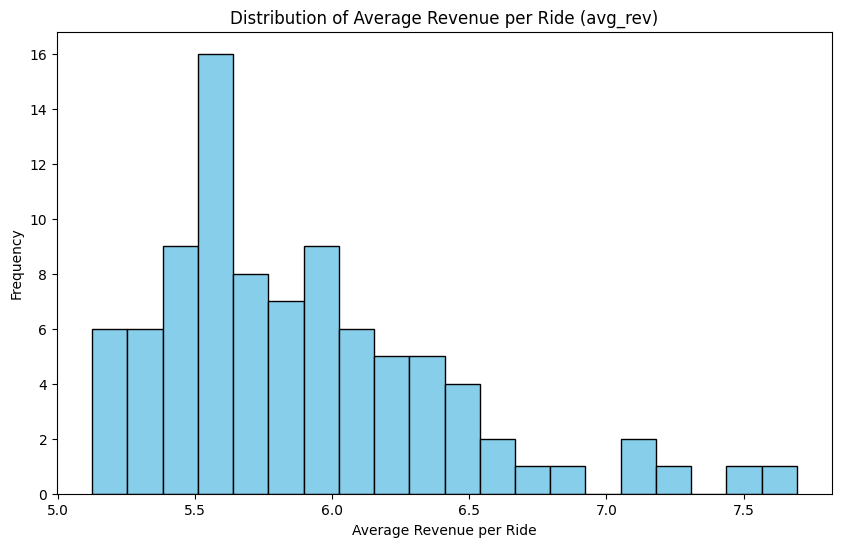

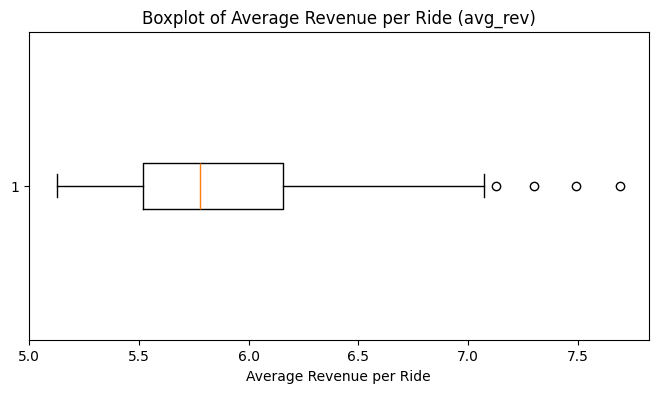

In [38]:
import matplotlib.pyplot as plt

# Histogram to show the distribution of avg_rev
plt.figure(figsize=(10, 6))
plt.hist(daily_summary_sorted['avg_rev'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Revenue per Ride (avg_rev)')
plt.xlabel('Average Revenue per Ride')
plt.ylabel('Frequency')
plt.show()

# Alternatively, using a boxplot to see the spread
plt.figure(figsize=(8, 4))
plt.boxplot(daily_summary_sorted['avg_rev'], vert=False)
plt.title('Boxplot of Average Revenue per Ride (avg_rev)')
plt.xlabel('Average Revenue per Ride')
plt.show()

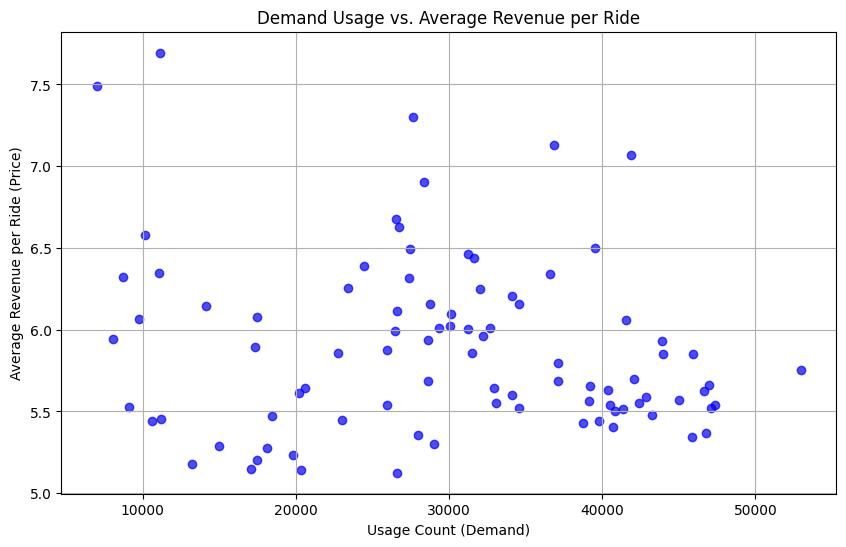

In [39]:
import matplotlib.pyplot as plt

# Scatter plot for demand usage vs. average revenue
plt.figure(figsize=(10, 6))
plt.scatter(daily_summary_sorted['usage_count'], daily_summary_sorted['avg_rev'], color='blue', alpha=0.7)
plt.title('Demand Usage vs. Average Revenue per Ride')
plt.xlabel('Usage Count (Demand)')
plt.ylabel('Average Revenue per Ride (Price)')
plt.grid(True)
plt.show()

In [40]:
# Calculate percentiles for usage_count
demand_percentiles = daily_summary_sorted['usage_count'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Percentiles for usage_count:\n", demand_percentiles)

# For each percentile of demand, get the corresponding total_revenue
revenue_at_percentiles = daily_summary_sorted.loc[daily_summary_sorted['usage_count'].isin(demand_percentiles), ['usage_count', 'total_revenue']]

print("Revenue at demand percentiles:\n", revenue_at_percentiles)

Percentiles for usage_count:
 0.01     7935.86
0.05     9915.00
0.10    11166.30
0.25    21112.00
0.50    30113.50
0.75    39703.00
0.90    44050.70
0.95    46726.55
0.99    47979.65
Name: usage_count, dtype: float64
Revenue at demand percentiles:
 Empty DataFrame
Columns: [usage_count, total_revenue]
Index: []


In [48]:
import numpy as np

# Calculate exact quantile values for usage_count (0.25, 0.5, 0.75, 0.95)
demand_percentiles = np.percentile(daily_summary_sorted['usage_count'], [25, 50, 75, 95])

# Map each demand percentile to its corresponding data points
percentile_mapping = []

for percentile_value in demand_percentiles:
    # Find the row where usage_count is equal or closest to the percentile value
    closest_row = daily_summary_sorted.iloc[(daily_summary_sorted['usage_count'] - percentile_value).abs().argmin()]
    # Get the corresponding revenue for that row
    avg_revenue = closest_row['avg_rev']
    percentile_mapping.append((percentile_value, avg_revenue))

# Display the results as percentages
percentiles = [25, 50, 75, 95]  # Corresponding percentages
for p, (percentile_value, avg_rev) in zip(percentiles, percentile_mapping):
    print(f"Demand percentile {p}% (usage count: {percentile_value}) has an average revenue of {avg_rev}")

Demand percentile 25% (usage count: 21112.0) has an average revenue of 5.640917043300773
Demand percentile 50% (usage count: 30113.5) has an average revenue of 6.021214126567124
Demand percentile 75% (usage count: 39703.0) has an average revenue of 5.442494908606341
Demand percentile 95% (usage count: 46726.55) has an average revenue of 5.36826553515316


Intercept: 6341.138618050347
Coefficient (slope): 5.657547184345805


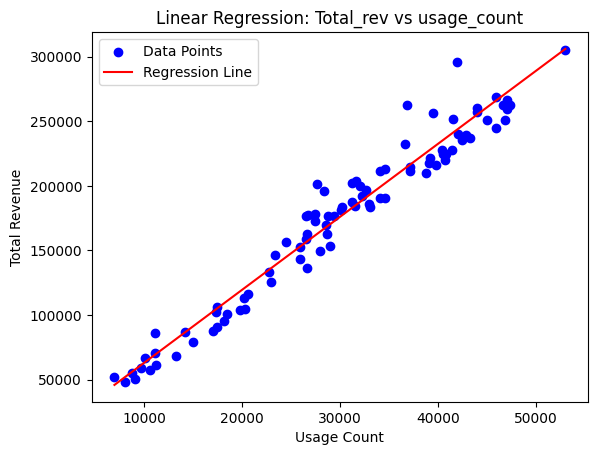

Predicted avg_rev for usage_count 10000: 62916.610461508404


C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming daily_summary_sorted is your DataFrame
# Prepare the data for the regression model
X = daily_summary_sorted[['usage_count']]  # Features (usage_count)
y = daily_summary_sorted['total_revenue']  # Target variable (avg_rev)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target (avg_rev) for the test set
y_pred = model.predict(X_test)

# Print out the model parameters (intercept and coefficient)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

# Plotting the data and the regression line
plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of the data
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Regression line
plt.xlabel('Usage Count')
plt.ylabel('Total Revenue')
plt.title('Linear Regression: Total_rev vs usage_count')
plt.legend()
plt.show()

# Optionally, predict the average revenue for a specific usage_count
specific_usage_count = 10000  # Example usage_count
predicted_avg_rev = model.predict(np.array([[specific_usage_count]]))
print(f"Predicted avg_rev for usage_count {specific_usage_count}: {predicted_avg_rev[0]}")

In [151]:
# Define a scaling factor that amplifies the effect of usage_count on revenue
def scale_usage_count(usage_count, k=1):  # k controls the sensitivity
    return usage_count ** k  # Can adjust the exponent to control the scaling

# Apply the scaling function
daily_summary_sorted['scaled_usage_count'] = daily_summary_sorted['usage_count'].apply(scale_usage_count)

# Prepare the data for the regression model
X = daily_summary_sorted[['scaled_usage_count']]  # Features (scaled usage_count)
y = daily_summary_sorted['total_revenue']  # Target variable (avg_rev)

# Train-test split and model training remains the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target (avg_rev) for the test set
y_pred = model.predict(X_test)

# Print out the model parameters (intercept and coefficient)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

Intercept: 6341.138618050347
Coefficient (slope): 5.657547184345805


In [152]:
import numpy as np

# Calculate exact quantile values for usage_count (0.25, 0.5, 0.75, 0.95)
demand_percentiles = np.percentile(daily_summary_sorted['usage_count'], [25, 50, 75, 95])

# Map each demand percentile to its corresponding data points
percentile_mapping = []

for percentile_value in demand_percentiles:
    # Find the row where usage_count is equal or closest to the percentile value
    closest_row = daily_summary_sorted.iloc[(daily_summary_sorted['usage_count'] - percentile_value).abs().argmin()]
    
    # include scaling factor to account for the size of demand as well
    # k is a constant that scales the effect of demand.
    # p is a parameter that controls the sensitivity of revenue to demand changes (typically, 0 < 𝑝 <1 for diminishing returns).
    
    
    predicted_avg_rev = model.predict(np.array([[closest_row['usage_count']]]))
    print(f"Predicted avg_rev for usage_count {closest_row['usage_count']}: {predicted_avg_rev[0]/closest_row['usage_count']}")

Predicted avg_rev for usage_count 20577: 5.965713516563833
Predicted avg_rev for usage_count 30071: 5.8684194073530325
Predicted avg_rev for usage_count 39773: 5.816980433485934
Predicted avg_rev for usage_count 46781: 5.79309663001927


C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [187]:
# Define a scaling factor that amplifies the effect of usage_count on revenue
def scale_usage_count(usage_count, k=0.95):  # k controls the sensitivity
    return usage_count ** k  # Can adjust the exponent to control the scaling

# Apply the scaling function
daily_summary_sorted['scaled_usage_count'] = daily_summary_sorted['usage_count'].apply(scale_usage_count)

# Prepare the data for the regression model
X = daily_summary_sorted[['scaled_usage_count']]  # Features (scaled usage_count)
y = daily_summary_sorted['total_revenue']  # Target variable (avg_rev)

# Train-test split and model training remains the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target (avg_rev) for the test set
y_pred = model.predict(X_test)

# Print out the model parameters (intercept and coefficient)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

Intercept: -2429.391629792168
Coefficient (slope): 9.9366778866279


In [188]:
import numpy as np

# Calculate exact quantile values for usage_count (0.25, 0.5, 0.75, 0.95)
demand_percentiles = np.percentile(daily_summary_sorted['usage_count'], [25, 50, 75, 95])

# Map each demand percentile to its corresponding data points
percentile_mapping = []

for percentile_value in demand_percentiles:
    # Find the row where usage_count is equal or closest to the percentile value
    closest_row = daily_summary_sorted.iloc[(daily_summary_sorted['usage_count'] - percentile_value).abs().argmin()]
    
    # include scaling factor to account for the size of demand as well
    # k is a constant that scales the effect of demand.
    # p is a parameter that controls the sensitivity of revenue to demand changes (typically, 0 < 𝑝 <1 for diminishing returns).

    
    predicted_avg_rev = model.predict(np.array([[closest_row['usage_count']]]))
    print(f"Predicted avg_rev for usage_count {closest_row['usage_count']}: {round(predicted_avg_rev[0] / closest_row['usage_count'], 2)}")

Predicted avg_rev for usage_count 20577: 9.82
Predicted avg_rev for usage_count 30071: 9.86
Predicted avg_rev for usage_count 39773: 9.88
Predicted avg_rev for usage_count 46781: 9.88


C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\angji\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
